# Optymalne Sterowanie Dronem w przestrzeni 3D

Poniżej przedstawiam uproszczoną implementację problemu sterowania czaso-optymalnego dla drona lecącego z $x_0 = (0, 0, 0)$ do $x_1 = (x_1, y_1, z_1)$.

Wektor stanu $x$ jest konkatenacją wektora pozycji $p = (x, y, z)$ oraz prędkości $v = (v_x, v_y, v_z)$:

$$
x = \left[\begin{array}{ccc}
x\\
y\\
z\\
v_x\\
v_y\\
v_z
\end{array}\right]
$$

Natomiast wektor sterowania $u$ jest siłą (w Newtonach), działającą na drona w wyniku pracy śmigieł:

$$
u = \left[\begin{array}{ccc}
F_x\\
F_y\\
F_z
\end{array}\right]
$$

Zakładając, że na drona nie działają żadne zewnętrzne siły, moglibyśmy zapisać dynamikę układu następująco:

$$
\dot{x} = \left[\begin{array}{ccc}
v_x \\
v_y \\
v_z \\
F_x / m\\
F_y / m\\
F_z / m
\end{array}\right] =

\left[\begin{array}{ccc}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 
\end{array}\right] x +

\left[\begin{array}{ccc}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\frac{1}{m} & 0 & 0 \\
0 & \frac{1}{m} & 0 \\
0 & 0 & \frac{1}{m} 
\end{array}\right] u

$$

Natomiast będziemy chcieli zbadać jak przyśpieszenie ziemskie $g$ będzie wpływać na zachowanie, zatem faktycznie rozważamy:

$$
\dot{x} = \left[\begin{array}{ccc}
v_x \\
v_y \\
v_z \\
F_x / m\\
F_y / m\\
F_z / m - g
\end{array}\right]
$$

# Korzystanie z symulacji

Tworząc drona możemy zdefiniować jego masę i maksymalną siłę:\
drone = OptiDrone(mass = 1.0, max_force = 20.00)

Następnie ewaluujemy go dla zadanego $x_1$:\
drone.eval(goal = [50.0, 50.0, 50.0, 0.0, 0.0, 0.0])

Po czym możemy wyświetlić związane z nim wizualizacje:\
drone.plot_xyz()
drone.plot_u()

In [5]:
from opti import OptiDrone

# Przykład 1: Słaby Dron

In [6]:
drone = OptiDrone(max_force = 9.82)
drone.eval(goal = [50.0, 50.0, 50.0, 0.0, 0.0, 0.0])

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3252
Number of nonzeros in inequality constraint Jacobian.:      721
Number of nonzeros in Lagrangian Hessian.............:      721

Total number of variables............................:     1087
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      732
Total number of inequality constraints...............:      721
        inequality constraints with only lower bounds:      361
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      360

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 5.00e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

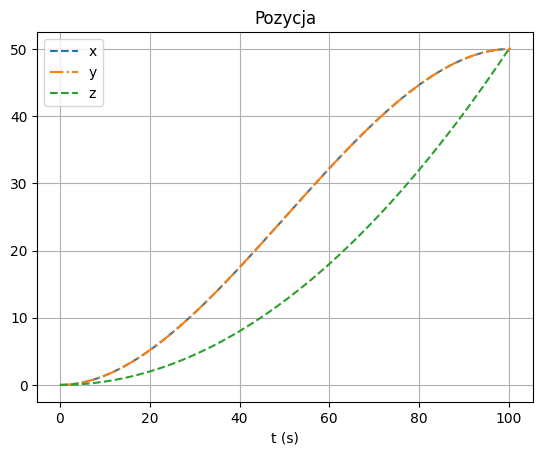

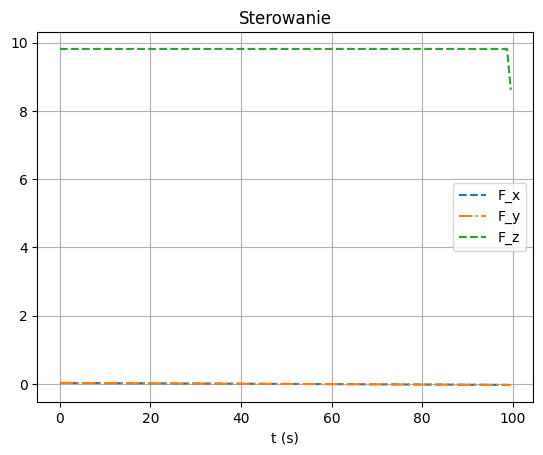

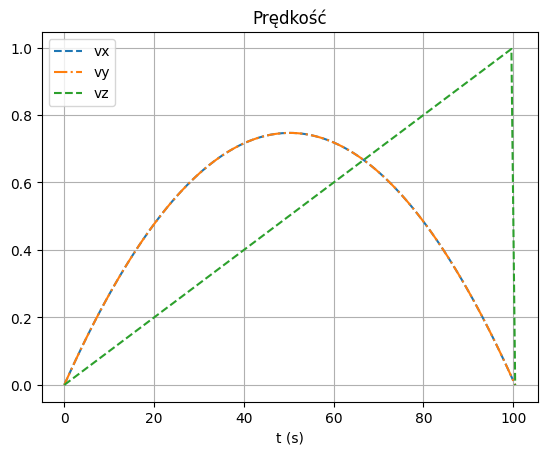

In [7]:
drone.plot_xyz()
drone.plot_u()
drone.plot_v()

# Przykład 2: Zwykły dron

In [8]:
drone = OptiDrone(max_force = 20.0)
drone.eval(goal = [50.0, 50.0, 50.0, 0.0, 0.0, 0.0])

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3252
Number of nonzeros in inequality constraint Jacobian.:      721
Number of nonzeros in Lagrangian Hessian.............:      721

Total number of variables............................:     1087
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      732
Total number of inequality constraints...............:      721
        inequality constraints with only lower bounds:      361
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      360

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 5.00e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

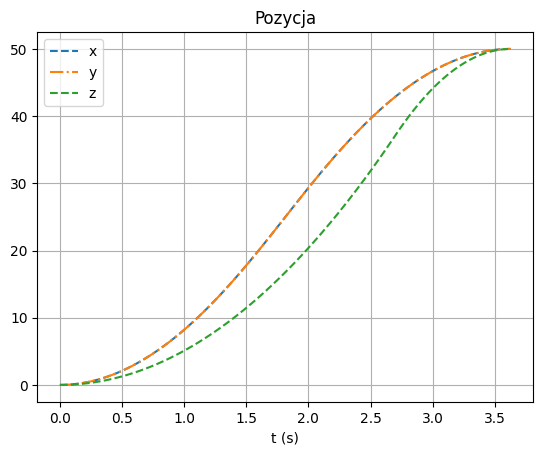

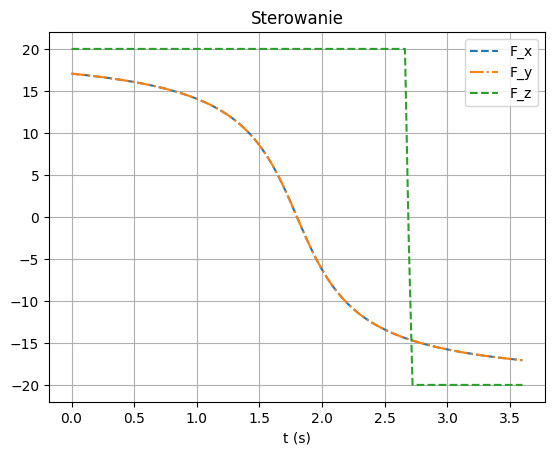

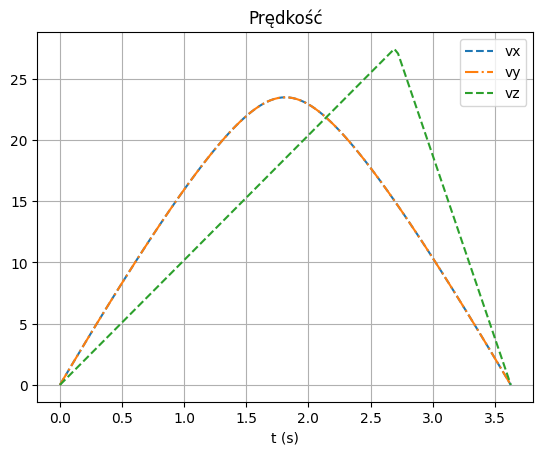

In [9]:
drone.plot_xyz()
drone.plot_u()
drone.plot_v()

# Przykład 3: Silny dron

In [13]:
drone = OptiDrone(max_force = 400.0)
drone.eval(goal = [50.0, 50.0, 50.0, 0.0, 0.0, 0.0])

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3252
Number of nonzeros in inequality constraint Jacobian.:      721
Number of nonzeros in Lagrangian Hessian.............:      721

Total number of variables............................:     1087
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      732
Total number of inequality constraints...............:      721
        inequality constraints with only lower bounds:      361
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      360

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 5.00e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

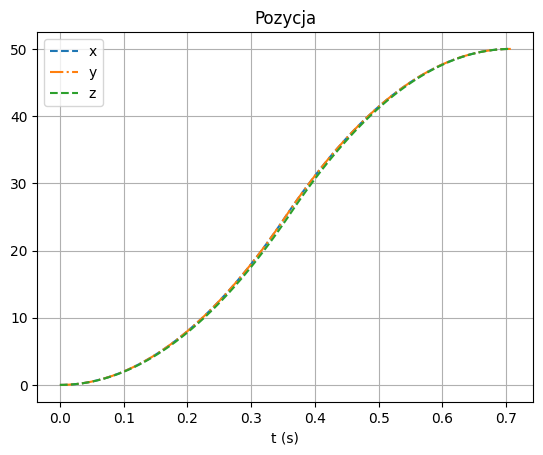

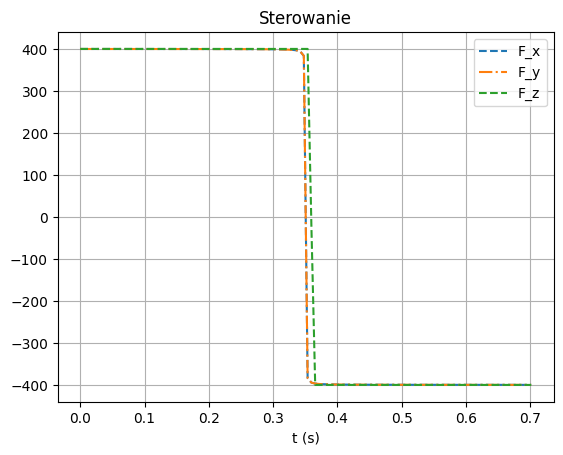

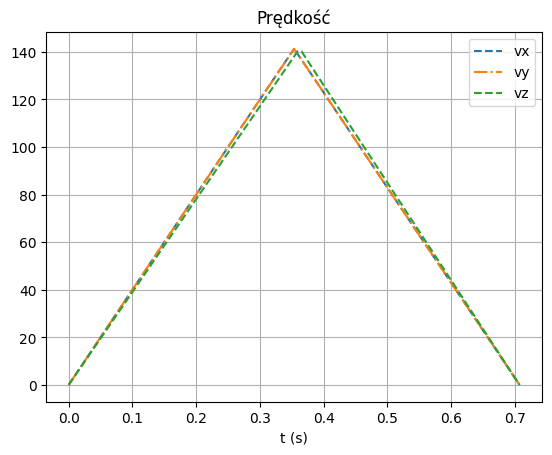

In [14]:
drone.plot_xyz()
drone.plot_u()
drone.plot_v()

# Alternatywa: Ograniczenie na sumę sił
Zamiast ograniczać każdą siłę z osobna, zobaczmy co się stanie, gdy ograniczymy sumę sił.

In [1]:
from opti2 import Opti2Drone

In [2]:
drone = Opti2Drone(max_force = 20.0)
drone.eval(goal = [50.0, 50.0, 50.0, 0.0, 0.0, 0.0])


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3252
Number of nonzeros in inequality constraint Jacobian.:      361
Number of nonzeros in Lagrangian Hessian.............:     1081

Total number of variables............................:     1087
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      732
Total number of inequality c

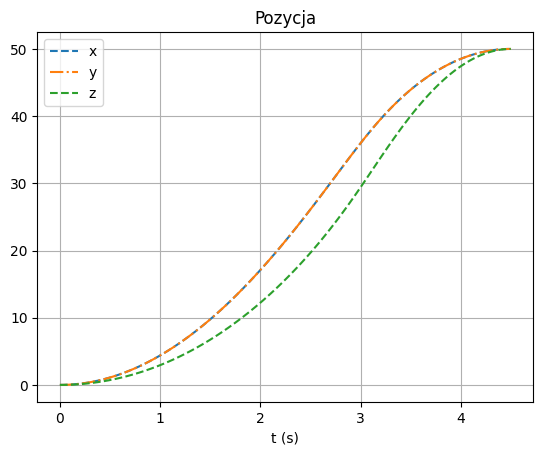

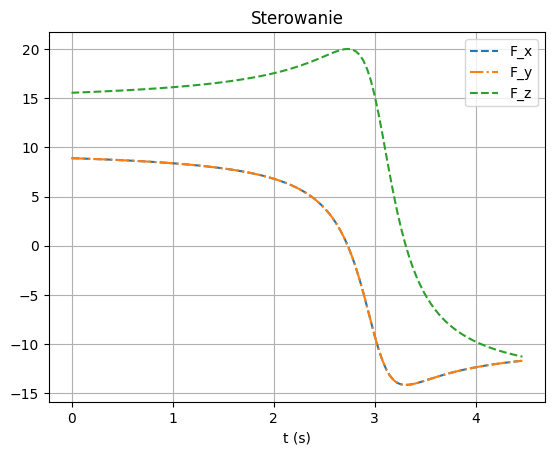

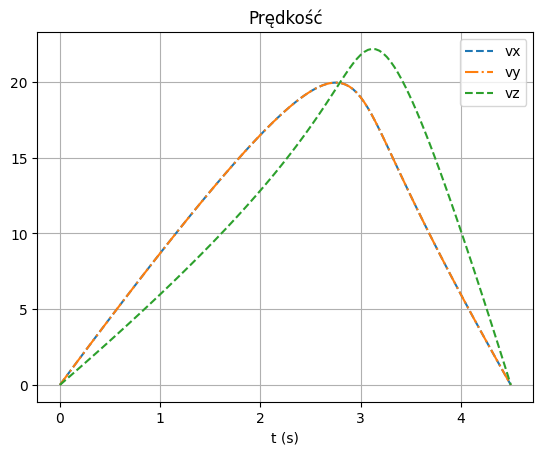

In [3]:
drone.plot_xyz()
drone.plot_u()
drone.plot_v()

# Przykład 5: Silny dron

In [5]:
drone = Opti2Drone(max_force = 200.0)
drone.eval(goal = [50.0, 50.0, 50.0, 0.0, 0.0, 0.0])

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3252
Number of nonzeros in inequality constraint Jacobian.:      361
Number of nonzeros in Lagrangian Hessian.............:     1081

Total number of variables............................:     1087
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      732
Total number of inequality constraints...............:      121
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 5.00e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

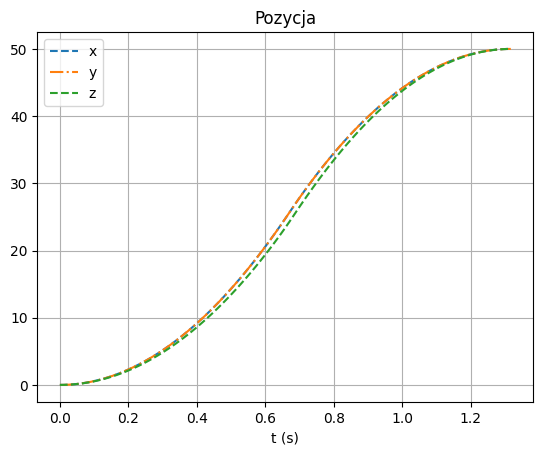

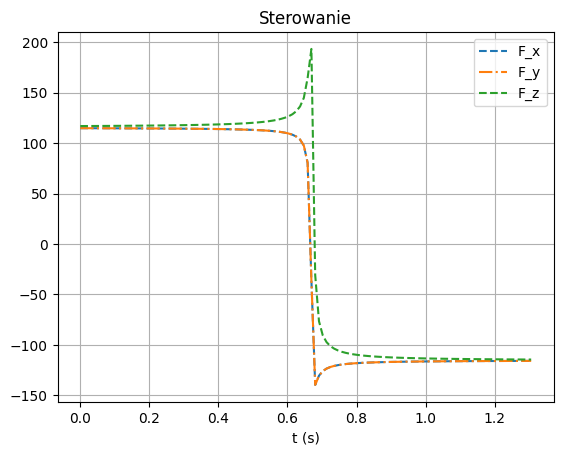

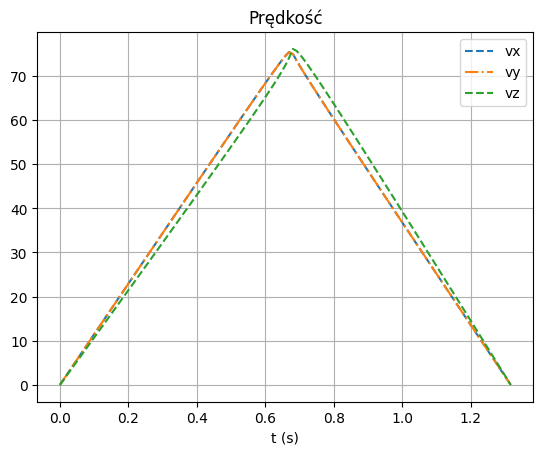

In [6]:
drone.plot_xyz()
drone.plot_u()
drone.plot_v()

# Przykład 6: Słaby dron

In [7]:
drone = Opti2Drone(max_force = 9.82)
drone.eval(goal = [50.0, 50.0, 50.0, 0.0, 0.0, 0.0])

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3252
Number of nonzeros in inequality constraint Jacobian.:      361
Number of nonzeros in Lagrangian Hessian.............:     1081

Total number of variables............................:     1087
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      732
Total number of inequality constraints...............:      121
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 5.00e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

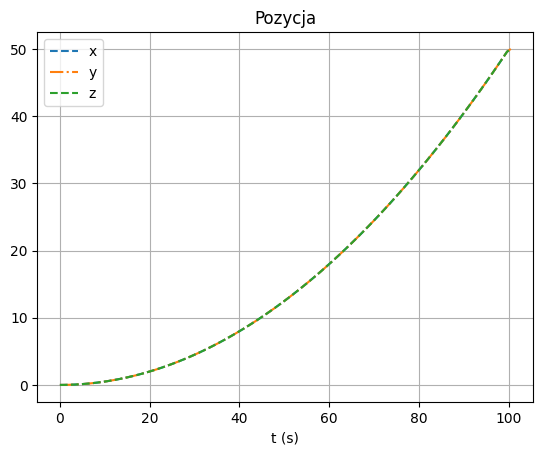

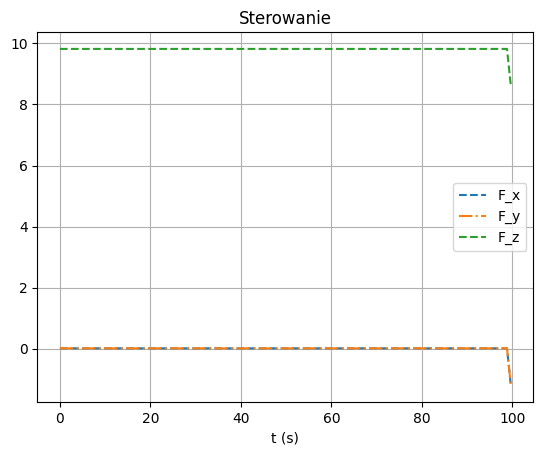

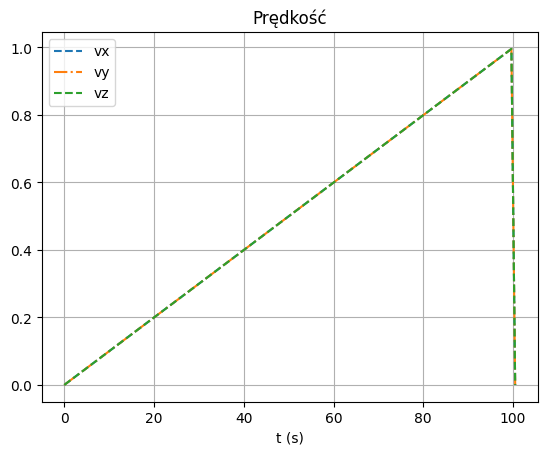

In [8]:
drone.plot_xyz()
drone.plot_u()
drone.plot_v()

# Przykład 7: Losowe współrzędne docelowe

In [13]:
import random

drone = Opti2Drone(max_force = 20.0)
drone.eval(goal = [random.randint(10, 100), random.randint(10, 100), random.randint(10, 100), 0.0, 0.0, 0.0])

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3252
Number of nonzeros in inequality constraint Jacobian.:      361
Number of nonzeros in Lagrangian Hessian.............:     1081

Total number of variables............................:     1087
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      732
Total number of inequality constraints...............:      121
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 5.40e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

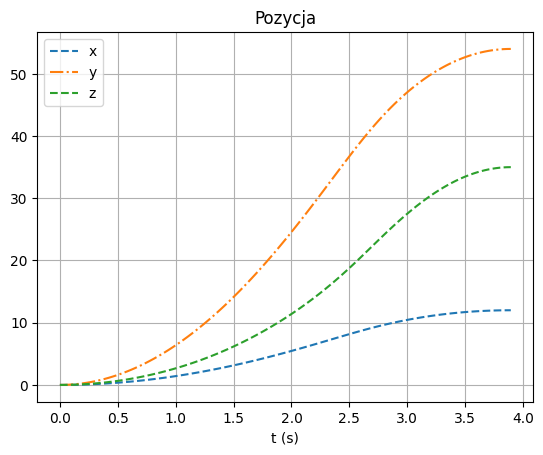

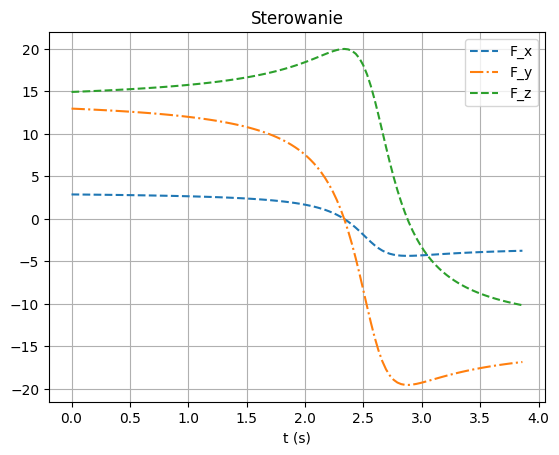

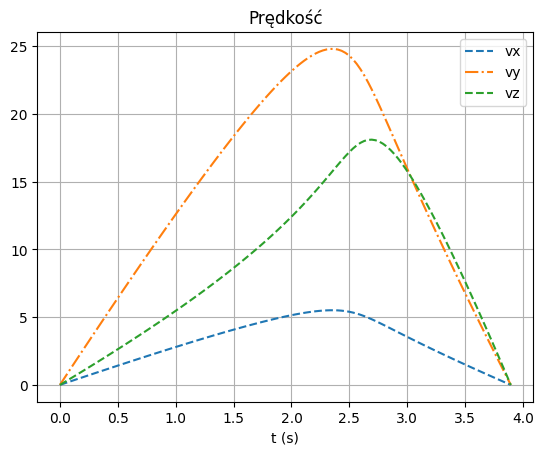

In [14]:
drone.plot_xyz()
drone.plot_u()
drone.plot_v()

# Przykład 8: Animacja

In [1]:
from opti import OptiDrone

drone = OptiDrone(max_force=20.0)
drone.eval(goal=[50.0, 50.0, 50.0, 0.0, 0.0, 0.0])


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3252
Number of nonzeros in inequality constraint Jacobian.:      721
Number of nonzeros in Lagrangian Hessian.............:      721

Total number of variables............................:     1087
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      732
Total number of inequality c

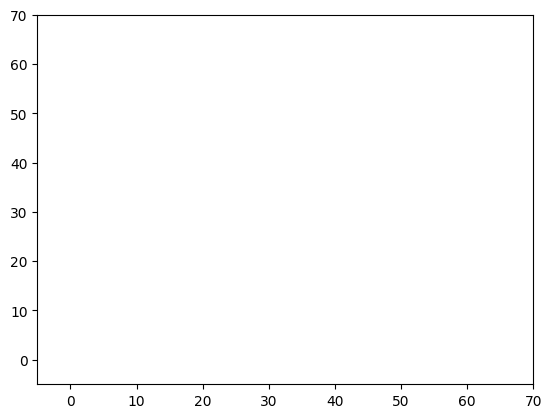

In [2]:
drone.animate()